In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=mnist.load_data()
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)
print('-'*50)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
--------------------------------------------------
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
#Some initialization
batch_size = 128
num_classes = 10
epochs = 12
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Applying CNN with 3 layers**

In [17]:
from keras.layers.normalization import BatchNormalization
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->FC-->Dropout-->Softmax
#We will use Relu as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 64)          0         
__________

In [13]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

W0629 19:38:00.390176 140361178707840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 51s 853us/step - loss: 0.3726 - acc: 0.8831 - val_loss: 0.1126 - val_acc: 0.9657
Epoch 2/12
60000/60000 [==============================] - 50s 831us/step - loss: 0.1063 - acc: 0.9674 - val_loss: 0.0756 - val_acc: 0.9752
Epoch 3/12
60000/60000 [==============================] - 50s 829us/step - loss: 0.0760 - acc: 0.9775 - val_loss: 0.0644 - val_acc: 0.9805
Epoch 4/12
60000/60000 [==============================] - 50s 825us/step - loss: 0.0597 - acc: 0.9818 - val_loss: 0.0506 - val_acc: 0.9844
Epoch 5/12
60000/60000 [==============================] - 49s 816us/step - loss: 0.0504 - acc: 0.9846 - val_loss: 0.0596 - val_acc: 0.9822
Epoch 6/12
60000/60000 [==============================] - 49s 812us/step - loss: 0.0423 - acc: 0.9867 - val_loss: 0.0524 - val_acc: 0.9846
Epoch 7/12
60000/60000 [==============================] - 49s 809us/step - loss: 0.0373 - acc: 0.9885 - val_loss: 0.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.0416184305918403
Test accuracy: 0.9876


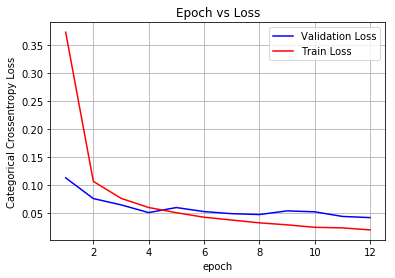

In [16]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Applying CNN with 5 layers**

In [36]:
#Conv2d-->Pooling-->Conv2d-->Dropout-->Pooling-->Conv2d-->BN-->Pooling-->Dropout-->Conv2D-->BN-->Pooling-->Conv2D-->Pooling-->FC-->Dropout-->Softmax
#We will use Relu as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 26, 26, 64)        16448     
_________________________________________________________________
dropout_28 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
batch_normalization_43 (Batc (None, 11, 11, 32)        44        
__________

In [37]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 246s 4ms/step - loss: 0.2913 - acc: 0.9065 - val_loss: 0.0726 - val_acc: 0.9789
Epoch 2/12
60000/60000 [==============================] - 239s 4ms/step - loss: 0.0743 - acc: 0.9771 - val_loss: 0.0622 - val_acc: 0.9821
Epoch 3/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0514 - acc: 0.9844 - val_loss: 0.0655 - val_acc: 0.9805
Epoch 4/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0436 - acc: 0.9867 - val_loss: 0.0488 - val_acc: 0.9844
Epoch 5/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0366 - acc: 0.9886 - val_loss: 0.0416 - val_acc: 0.9867
Epoch 6/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0430 - val_acc: 0.9864
Epoch 7/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0294 - acc: 0.9910 - val_loss: 0.0307 - 

Test score: 0.03646882001824051
Test accuracy: 0.9908


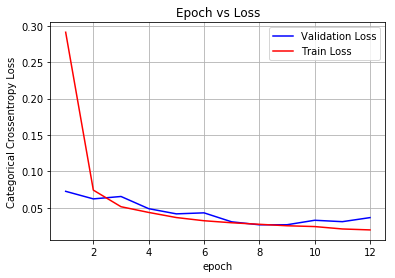

In [38]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Applying CNN with 7 layers**

In [73]:
#Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->Conv2d-->Dropout-->Pooling-->Conv2d-->Dropout-->Pooling-->Conv2d-->BN-->Pooling-->Dropout-->Conv2D-->BN-->Pooling-->Conv2D-->Pooling-->FC-->Dropout-->Softmax
#We will use Relu as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Seventh Layer
model.add(Conv2D(8,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_333 (Conv2D)          (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_325 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_334 (Conv2D)          (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_142 (Bat (None, 22, 22, 64)        88        
_________________________________________________________________
max_pooling2d_326 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_335 (Conv2D)          (None, 9, 9, 32)          18464     
_________________________________________________________________
dropout_122 (Dropout)        (None, 9, 9, 32)          0         
__________

In [74]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 294s 5ms/step - loss: 0.8691 - acc: 0.6921 - val_loss: 0.1066 - val_acc: 0.9679
Epoch 2/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.1616 - acc: 0.9552 - val_loss: 0.0551 - val_acc: 0.9826
Epoch 3/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.1080 - acc: 0.9702 - val_loss: 0.0644 - val_acc: 0.9813
Epoch 4/12
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0826 - acc: 0.9773 - val_loss: 0.0385 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0736 - acc: 0.9794 - val_loss: 0.0404 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0646 - acc: 0.9819 - val_loss: 0.0340 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0575 - acc: 0.9840 - val_loss: 0.0312 - 

Test score: 0.032224515436636285
Test accuracy: 0.9914


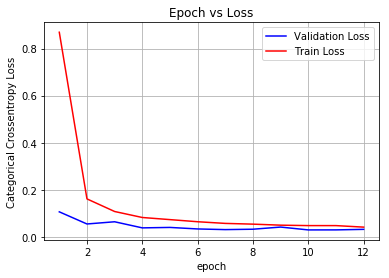

In [75]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Observations**

In [76]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No of layers", "Accuracy %"]

x.add_row(["3","98.76"])
x.add_row(["5","99.08"])
x.add_row(["7","99.14"])



print(x)

+--------------+------------+
| No of layers | Accuracy % |
+--------------+------------+
|      3       |   98.76    |
|      5       |   99.08    |
|      7       |   99.14    |
+--------------+------------+


**Our 3 layer model arranged in this order:**

*Conv2d-->Max Pooling-->Conv2d-->Max Pooling-->Conv2d-->BN-->Max      Pooling-->FC-->Dropout-->Softmax*

**Our 5 layer model arranged in :** 
 
*Conv2d-->Pooling-->Conv2d-->Dropout-->Pooling-->Conv2d-->BN-->Pooling-->Dropout-->Conv2D-->BN-->Pooling-->Conv2D-->Pooling-->FC-->Dropout-->Softmax*

**Our 7 layer model arranged in:** 

*Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->Conv2d-->Dropout-->Pooling-->Conv2d-->Dropout-->Pooling-->Conv2d-->BN-->Pooling-->Dropout-->Conv2D-->BN-->Pooling-->Conv2D-->Pooling-->FC-->Dropout-->Softmax*

Where BN= Batch Normalization and FC= Fully Connected.

We used different kernel_size and pool_size for our different layers and we can observe that after increasing number of layers our accuracy increases. We applied batch normalisation not at all layers to reduce internal covariate shift.